In [1]:
# Cell 1: Importing Required Libraries

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Adding src directory to path for importing custom modules
sys.path.append('../src')

# Importing custom utility functions
from config import *
from data_utils import *
from visualization import *

# Setting visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

# Displaying settings for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

print("All libraries imported successfully!")
print(f"Working Directory: {Path.cwd()}")
print(f"Random Seed: {SEED_VALUE}")

All libraries imported successfully!
Working Directory: C:\Users\Ashutosh\Documents\Projects\beyond-smote-evaluation\notebooks
Random Seed: 42


In [2]:
# Cell 2: Dataset Overview and Citation

print("HIGGS Dataset Information")
print("\nDataset Citation")
print("Whiteson, D. (2014). HIGGS [Dataset]. UCI Machine Learning Repository.")
print("https://doi.org/10.24432/C5V312")
print("\nOriginal Paper:")
print("Baldi, P., Sadowski, P., & Whiteson, D. (2014).")
print("Searching for exotic particles in high-energy physics with deep learning.")
print("Nature Communications, 5(1), 4308.")

print("\nDataset Specifications")
print(f"  • Total Rows: {TOTAL_ROWS:,}")
print(f"  • Total Features: {FEATURE_COUNT}")
print(f"  • Target Classes: {CLASS_COUNT} (Binary Classification)")
print(f"  • File Size: ~8 GB uncompressed")
print(f"  • Source: UCI Machine Learning Repository")
print(f"  • Domain: Particle Physics (CERN)")
print(f"  • Task: Distinguish Higgs boson signal from background")

print("\nProblem Statement:")
print("To classify particle collision events as signal (presence of Higgs boson)")
print("or background (absence of Higgs boson) using 28 physics-based features.")

HIGGS Dataset Information

Dataset Citation
Whiteson, D. (2014). HIGGS [Dataset]. UCI Machine Learning Repository.
https://doi.org/10.24432/C5V312

Original Paper:
Baldi, P., Sadowski, P., & Whiteson, D. (2014).
Searching for exotic particles in high-energy physics with deep learning.
Nature Communications, 5(1), 4308.

Dataset Specifications
  • Total Rows: 11,000,000
  • Total Features: 28
  • Target Classes: 2 (Binary Classification)
  • File Size: ~8 GB uncompressed
  • Source: UCI Machine Learning Repository
  • Domain: Particle Physics (CERN)
  • Task: Distinguish Higgs boson signal from background

Problem Statement:
To classify particle collision events as signal (presence of Higgs boson)
or background (absence of Higgs boson) using 28 physics-based features.


In [6]:
# Cell 3: Loading HIGGS Dataset (with Sampling)
# Purpose: Loading the dataset with sampling for faster processing
# Note: Using 1M samples initially; will increase for final experiments

print("LOADING HIGGS DATASET ...")

# For full experiment, I will set row_limit=None to use all 11M rows
X, y = load_higgs_dataset(
    file_location=DATA_FILE,
    row_limit=SAMPLE_ROWS,  # Using 1M samples (set in config.py)
    show_info=True
)

print("\nDataset loaded successfully!")
print(f"Feature Matrix Shape: {X.shape}")
print(f"Target Vector Shape: {y.shape}")
print(f"Memory Usage: {X.memory_usage(deep=True).sum() / 1e6:.2f} MB")

LOADING HIGGS DATASET ...
Loading HIGGS dataset from file...
Source: C:\Users\Ashutosh\Documents\Projects\beyond-smote-evaluation\data\raw\HIGGS.csv
Reading 1,000,000 rows from dataset...
Dataset loaded successfully
Shape: (1000000, 28)
Memory Usage: 112.00 MB
Class Distribution:
  Signal (1): 529,673 (52.97%)
  Background (0): 470,327 (47.03%)
  Imbalance Ratio: 1.126:1

Dataset loaded successfully!
Feature Matrix Shape: (1000000, 28)
Target Vector Shape: (1000000,)
Memory Usage: 112.00 MB


In [7]:
# Cell 4: Dataset Statistical Summary
# Count, Mean, std, min, max, quartiles for each feature

print("STATISTICAL SUMMARY OF FEATURES")

# Displaying descriptive statistics
stats_summary = X.describe()
print(stats_summary)

# Additional statistics
print("\nAdditional Statistics:")
print(f"  • Skewness (mean): {X.skew().mean():.3f}")
print(f"  • Kurtosis (mean): {X.kurtosis().mean():.3f}")
print(f"  • Range (mean): {(X.max() - X.min()).mean():.3f}")

# Identifying features with highest variance
print("\nTop 5 Features by Variance:")
variance_df = pd.DataFrame({
    'Feature': X.columns,
    'Variance': X.var().values
}).sort_values('Variance', ascending=False)
print(variance_df.head())

STATISTICAL SUMMARY OF FEATURES
         lepton_pT  lepton_eta  lepton_phi  missing_energy_magnitude  \
count  1000000.000   1.000e+06   1.000e+06                 1.000e+06   
mean         0.992   4.885e-04  -9.528e-04                 9.981e-01   
std          0.565   1.008e+00   1.006e+00                 5.992e-01   
min          0.275  -2.435e+00  -1.743e+00                 6.260e-04   
25%          0.591  -7.373e-01  -8.719e-01                 5.765e-01   
50%          0.854   9.198e-04   4.166e-04                 8.916e-01   
75%          1.237   7.382e-01   8.688e-01                 1.293e+00   
max          8.712   2.435e+00   1.743e+00                 9.901e+00   

       missing_energy_phi     jet_1_pt  jet_1_eta  jet_1_phi  jet_1_b_tag  \
count           1.000e+06  1000000.000  1.000e+06  1.000e+06  1000000.000   
mean           -5.726e-04        0.991 -8.239e-04  5.487e-04        1.000   
std             1.007e+00        0.475  1.010e+00  1.006e+00        1.028   
min        

In [8]:
# Cell 5: Missing Value Check
# Checking for missing, null, or infinite values in the dataset

print("MISSING VALUE ANALYSIS")

# Checking for missing values
missing_counts = X.isnull().sum()
total_missing = missing_counts.sum()

print(f"\nTotal Missing Values: {total_missing}")
print(f"Missing Values per Feature:")
print(missing_counts[missing_counts > 0] if total_missing > 0 else "  No missing values found!")

# Checking for infinite values
infinite_counts = np.isinf(X).sum()
total_infinite = infinite_counts.sum()

print(f"\nTotal Infinite Values: {total_infinite}")
print(f"Infinite Values per Feature:")
print(infinite_counts[infinite_counts > 0] if total_infinite > 0 else "  No infinite values found!")

# Checking data types
print("\nData Types:")
print(X.dtypes.value_counts())

print("\nData Quality Check Done")

MISSING VALUE ANALYSIS

Total Missing Values: 0
Missing Values per Feature:
  No missing values found!

Total Infinite Values: 0
Infinite Values per Feature:
  No infinite values found!

Data Types:
float32    28
Name: count, dtype: int64

Data Quality Check Done


In [10]:
# Cell 6: Target Distribution Analysis (Class Imbalance)
# Analyzing class distribution and calculating imbalance ratio

print("TARGET VARIABLE ANALYSIS")

# Counting samples per class
class_counts = y.value_counts().sort_index()
class_percentages = y.value_counts(normalize=True).sort_index() * 100

print("\nClass Distribution:")
print(f"  • Background (0): {class_counts[0]:,} samples ({class_percentages[0]:.2f}%)")
print(f"  • Signal (1): {class_counts[1]:,} samples ({class_percentages[1]:.2f}%)")

# Calculating imbalance ratio
minority_class = class_counts.min()
majority_class = class_counts.max()
imbalance_ratio = minority_class / majority_class

print(f"\nImbalance Metrics:")
print(f"  • Imbalance Ratio: {imbalance_ratio:.3f}:1")
print(f"  • Minority/Majority: {minority_class:,} / {majority_class:,}")

# Determining imbalance severity
if imbalance_ratio > 0.8:
    severity = "Mild (relatively balanced)"
elif imbalance_ratio > 0.5:
    severity = "Moderate"
elif imbalance_ratio > 0.2:
    severity = "Severe"
else:
    severity = "Extreme"

print(f"  • Imbalance Severity: {severity}")

print("\nInsight: This is a MILD imbalance case, making it ideal for")
print("   comparing resampling methods without extreme class skew.")

TARGET VARIABLE ANALYSIS

Class Distribution:
  • Background (0): 470,327 samples (47.03%)
  • Signal (1): 529,673 samples (52.97%)

Imbalance Metrics:
  • Imbalance Ratio: 0.888:1
  • Minority/Majority: 470,327 / 529,673
  • Imbalance Severity: Mild (relatively balanced)

Insight: This is a MILD imbalance case, making it ideal for
   comparing resampling methods without extreme class skew.


Generating class distribution visualizations...
Class distribution plot saved to C:\Users\Ashutosh\Documents\Projects\beyond-smote-evaluation\results\figures\01_class_distribution.png


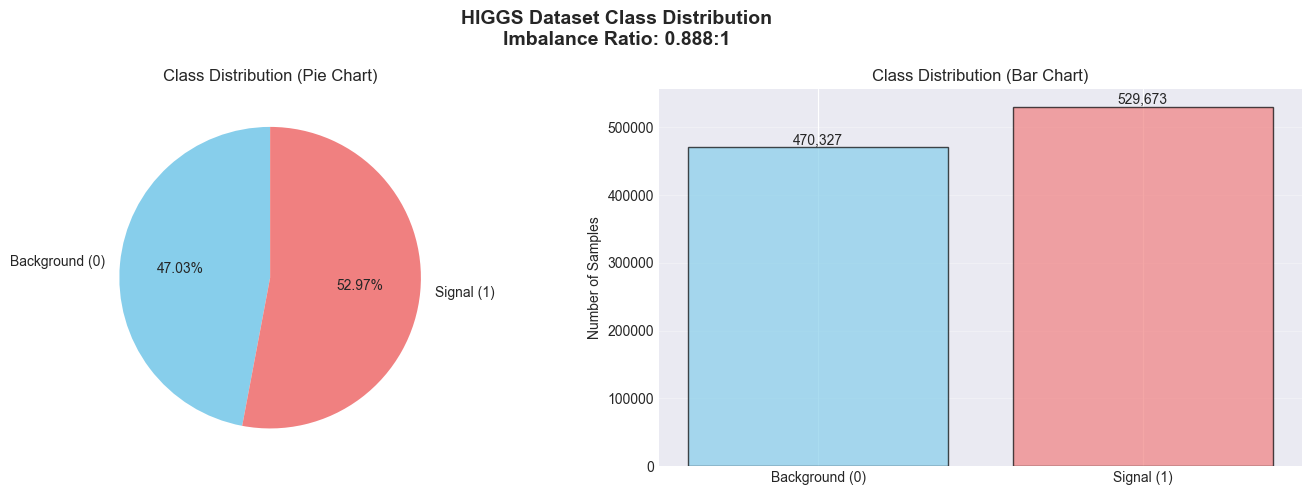

Class distribution plots created and saved


In [12]:
# Cell 7: Visualize Class Distribution (Pie + Bar Charts)
# Showing distribution as pie chart and bar chart

print("Generating class distribution visualizations...")

# Creating visualization using custom function
plot_class_distribution(
    labels=y,
    class_names=['Background (0)', 'Signal (1)'],
    save_path=FIGURE_OUTPUT / '01_class_distribution.png',
    figure_title='HIGGS Dataset Class Distribution'
)

print("Class distribution plots created and saved")

Generating feature distribution plots...
Feature distributions saved to C:\Users\Ashutosh\Documents\Projects\beyond-smote-evaluation\results\figures\02_feature_distributions_lowlevel.png


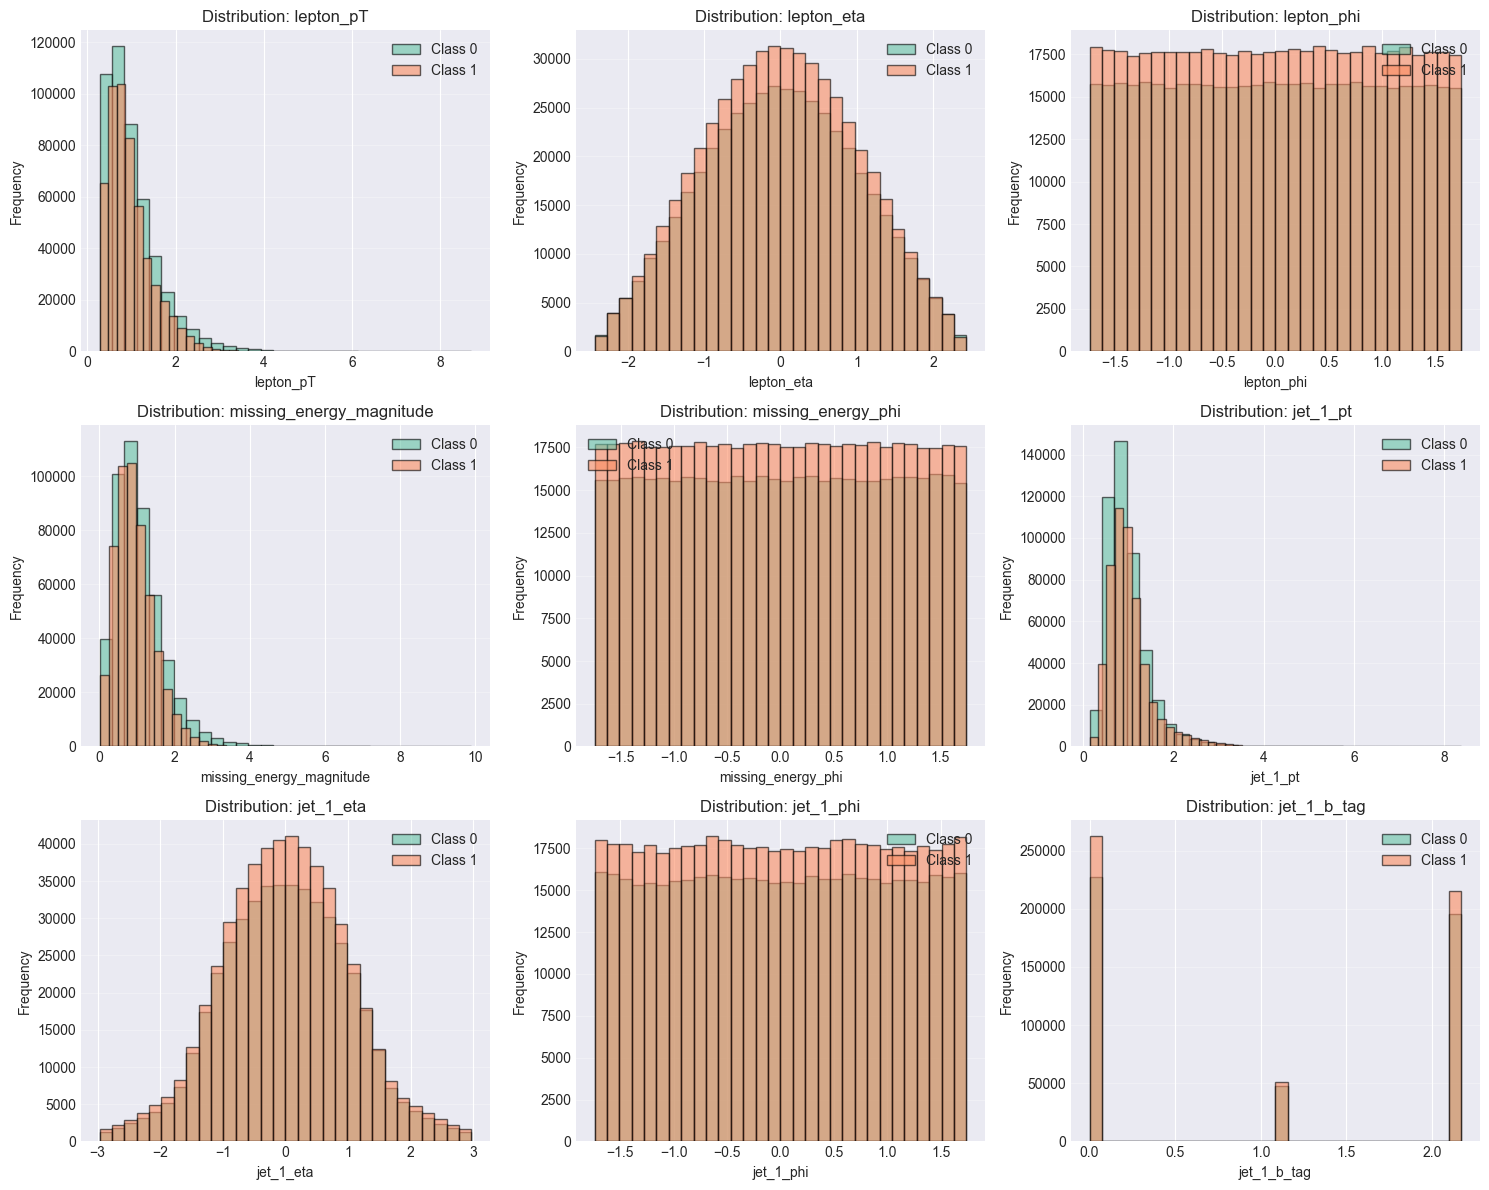

Low-level feature distributions plotted
Feature distributions saved to C:\Users\Ashutosh\Documents\Projects\beyond-smote-evaluation\results\figures\03_feature_distributions_highlevel.png


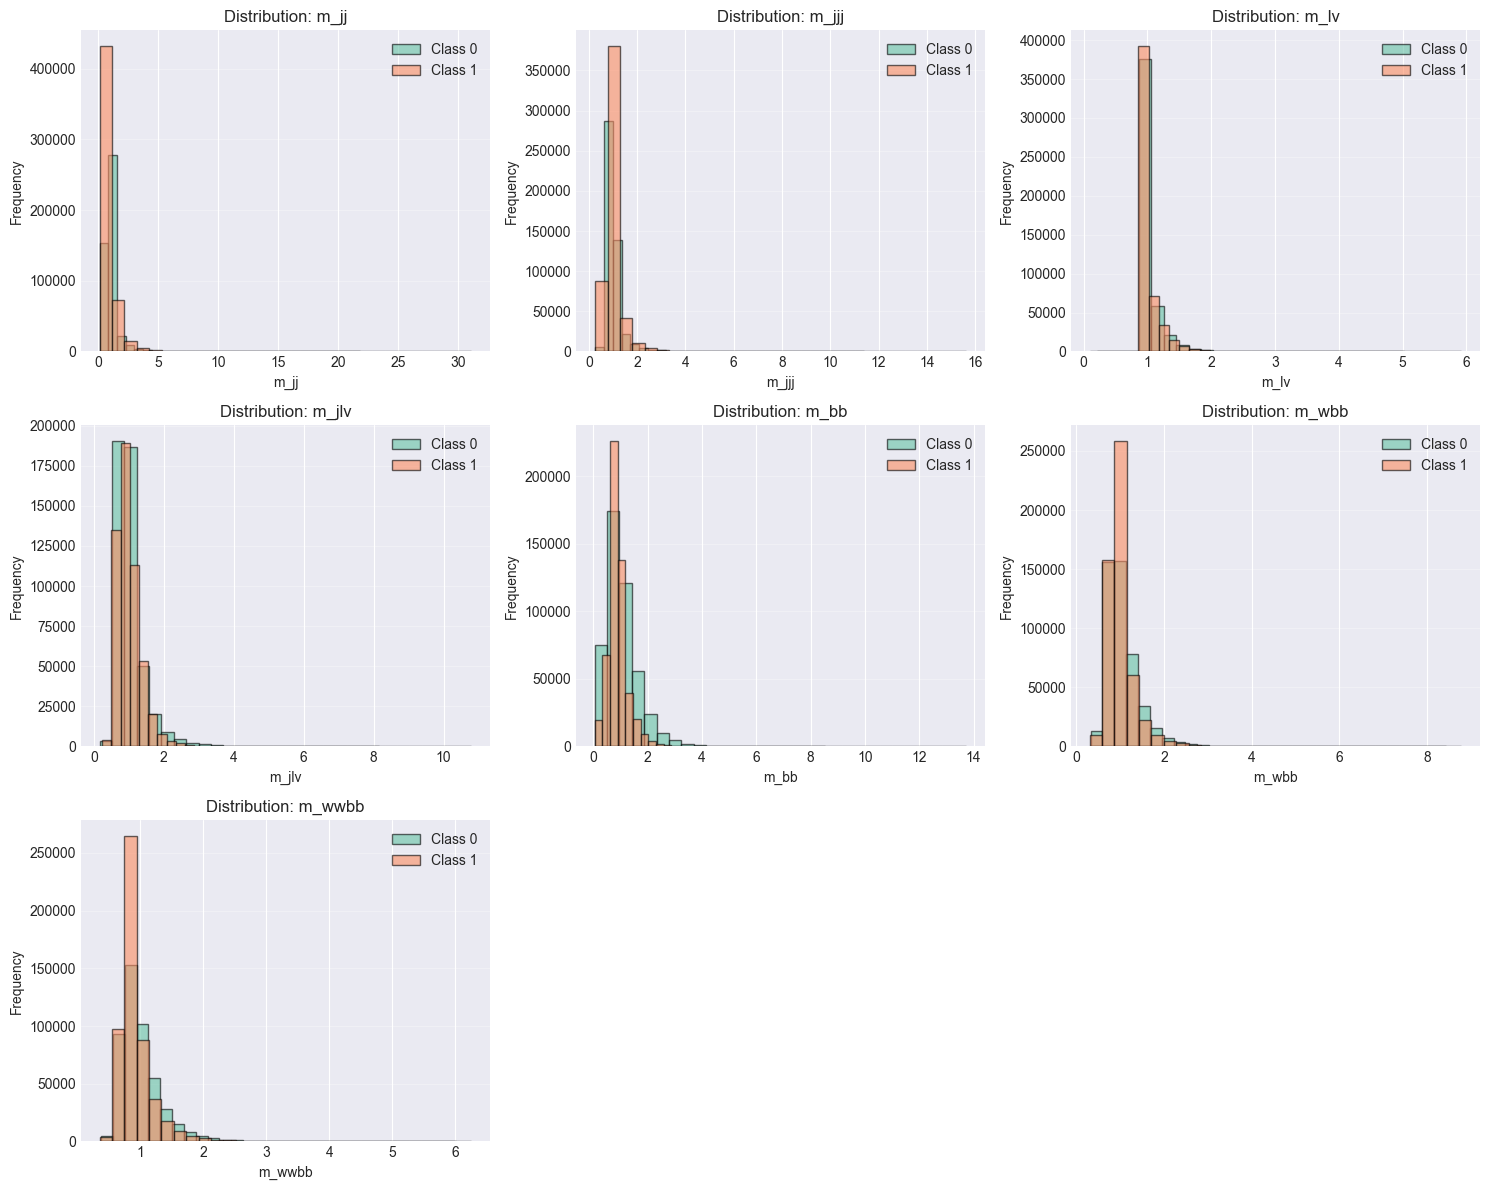

High-level feature distributions plotted


In [13]:
# Cell 8: Feature Distributions by Class
# Comparing feature distributions between signal and background
# Histograms showing overlapping distributions for each class

print("Generating feature distribution plots...")

# Combining features and target for plotting
data_with_target = X.copy()
data_with_target[TARGET_COL] = y

# Plotting distributions for first 9 features (low-level physics features)
plot_feature_distributions(
    data=data_with_target,
    features=ALL_FEATURES[:9],  # First 9 features
    target_col=TARGET_COL,
    save_path=FIGURE_OUTPUT / '02_feature_distributions_lowlevel.png',
    max_features=9
)

print("Low-level feature distributions plotted")

# Plotting distributions for high-level derived features
plot_feature_distributions(
    data=data_with_target,
    features=ALL_FEATURES[-7:],  # Last 7 high-level features
    target_col=TARGET_COL,
    save_path=FIGURE_OUTPUT / '03_feature_distributions_highlevel.png',
    max_features=7
)

print("High-level feature distributions plotted")

In [14]:
# Cell 9: Feature Descriptions
# Displaying detailed descriptions of all 28 physics features

print("FEATURE DESCRIPTIONS")

# Getting feature descriptions
feature_descriptions = retrieve_feature_descriptions()

print("\nLow-Level Features (21 features):")
print("These are direct measurements from particle detectors:")
for i, feature in enumerate(ALL_FEATURES[:21], 1):
    desc = feature_descriptions.get(feature, 'No description available')
    print(f"  {i:2d}. {feature:30s} - {desc}")

print("\nHigh-Level Features (7 features):")
print("These are derived/computed features from physics calculations:")
for i, feature in enumerate(ALL_FEATURES[21:], 22):
    desc = feature_descriptions.get(feature, 'No description available')
    print(f"  {i:2d}. {feature:30s} - {desc}")

print("\nInsight: Low-level features are raw detector measurements,")
print("while high-level features are physics-derived quantities like mass.")

FEATURE DESCRIPTIONS

Low-Level Features (21 features):
These are direct measurements from particle detectors:
   1. lepton_pT                      - Lepton transverse momentum component
   2. lepton_eta                     - Lepton pseudorapidity measurement
   3. lepton_phi                     - Lepton azimuthal angle
   4. missing_energy_magnitude       - Transverse missing energy magnitude
   5. missing_energy_phi             - Missing energy azimuthal direction
   6. jet_1_pt                       - Leading jet transverse momentum
   7. jet_1_eta                      - Leading jet pseudorapidity
   8. jet_1_phi                      - Leading jet azimuthal angle
   9. jet_1_b_tag                    - Leading jet bottom quark tag
  10. jet_2_pt                       - Second jet transverse momentum
  11. jet_2_eta                      - Second jet pseudorapidity
  12. jet_2_phi                      - Second jet azimuthal angle
  13. jet_2_b_tag                    - Second jet bottom

Generating correlation heatmap...
Correlation heatmap saved to C:\Users\Ashutosh\Documents\Projects\beyond-smote-evaluation\results\figures\04_correlation_heatmap.png


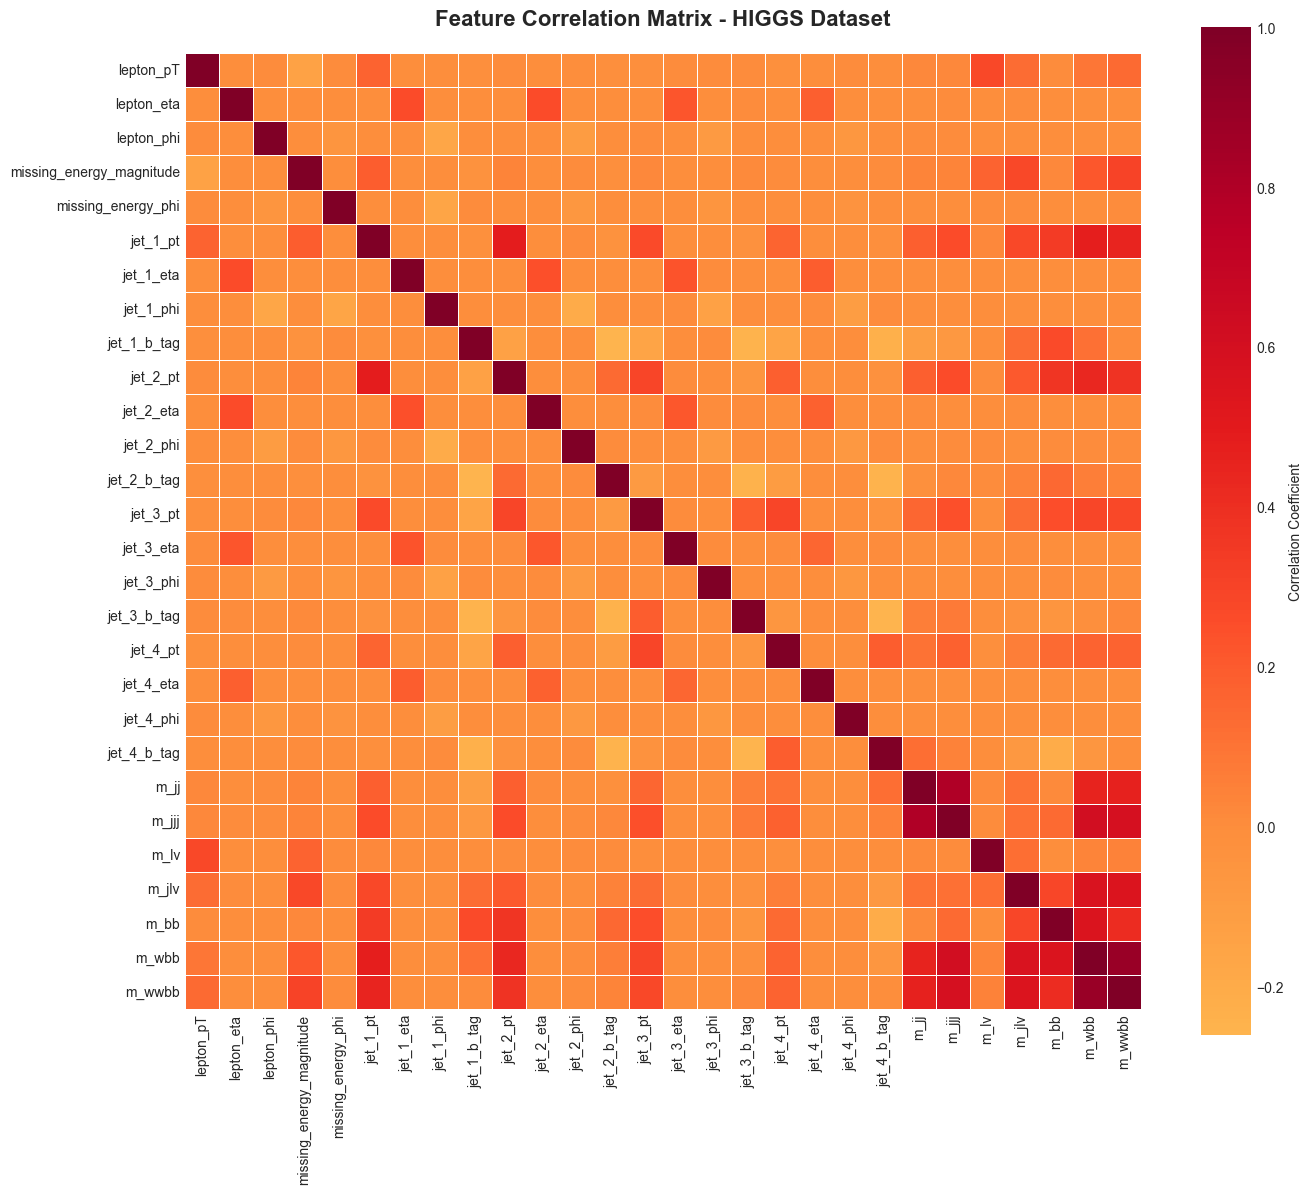

Correlation heatmap created!

Highly Correlated Feature Pairs (|r| > 0.7):
Feature 1 Feature 2  Correlation
    m_wbb    m_wwbb        0.895
     m_jj     m_jjj        0.795


In [15]:
# Cell 10: Correlation Analysis - Heatmap
# Identifying relationships between features using correlation matrix

print("Generating correlation heatmap...")

# Creating correlation heatmap
plot_correlation_heatmap(
    data=X,
    features=ALL_FEATURES,
    save_path=FIGURE_OUTPUT / '04_correlation_heatmap.png',
    figure_title='Feature Correlation Matrix - HIGGS Dataset'
)

print("Correlation heatmap created!")

# Identifying highly correlated feature pairs
print("\nHighly Correlated Feature Pairs (|r| > 0.7):")
corr_matrix = X.corr()
high_corr = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr).sort_values('Correlation', ascending=False)
    print(high_corr_df.to_string(index=False))
else:
    print("No highly correlated pairs found (good for model diversity)")

Generating pairwise relationship plots...
Creating pairplot for features: ['lepton_pT', 'missing_energy_magnitude', 'jet_1_pt', 'm_jj', 'm_wwbb']
Pairplot saved to C:\Users\Ashutosh\Documents\Projects\beyond-smote-evaluation\results\figures\05_pairwise_relationships.png


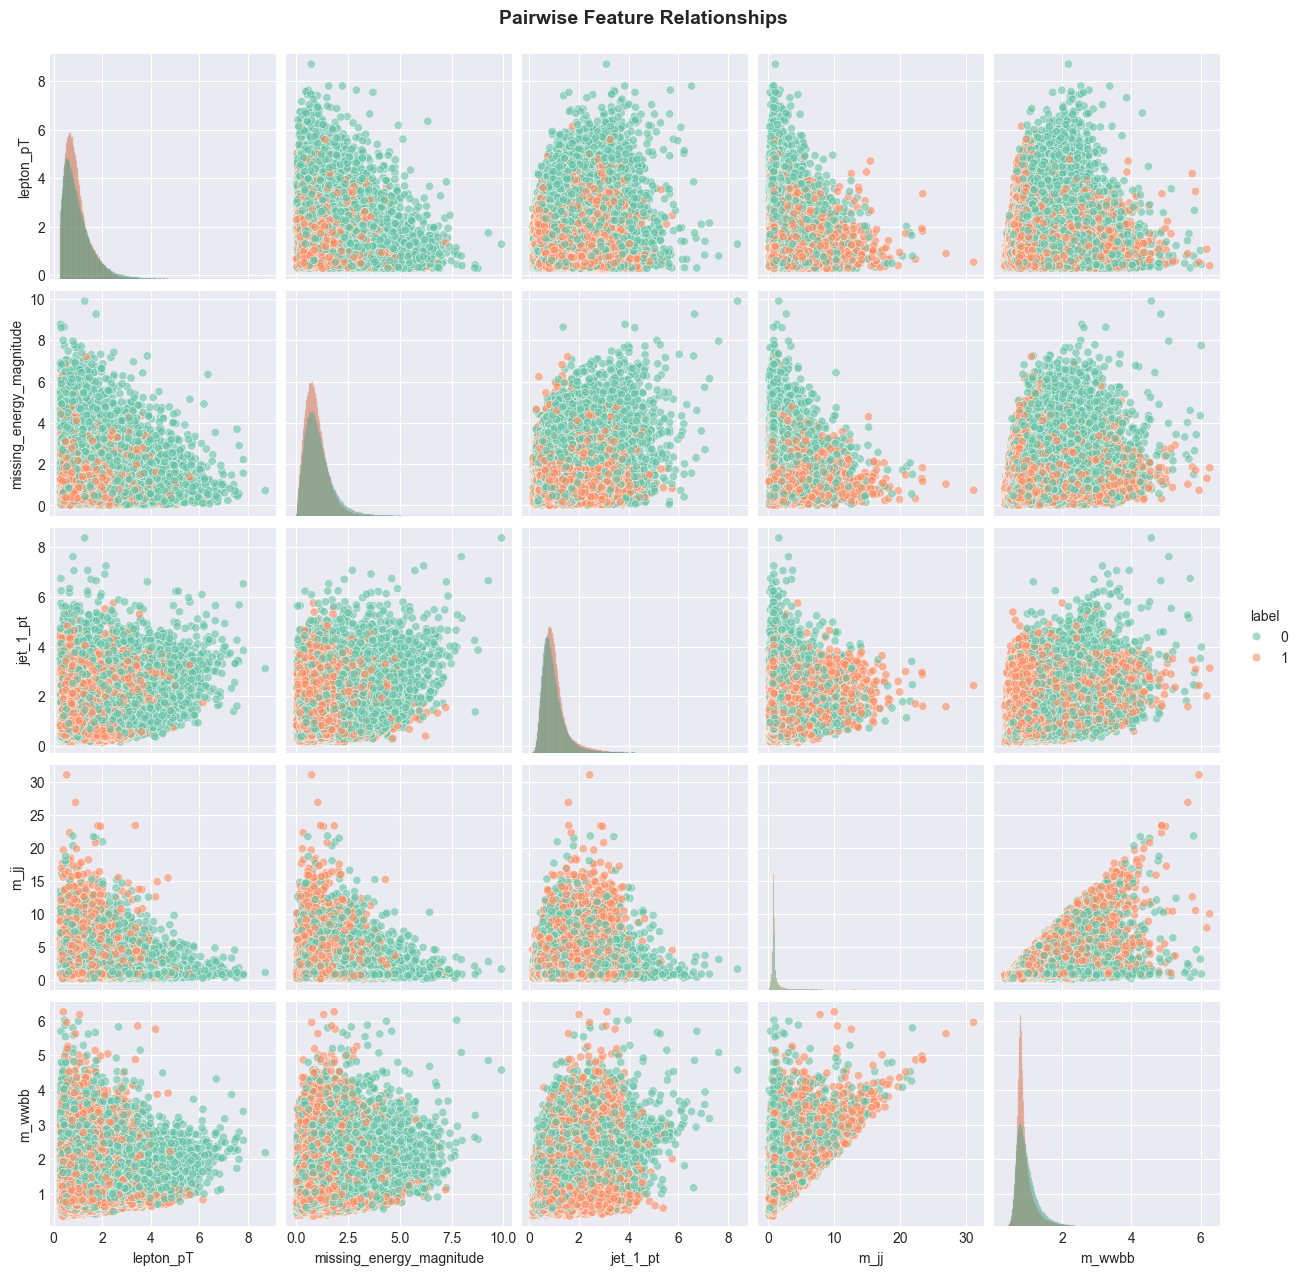

Pairplot created successfully!


In [16]:
# Cell 11: Pairwise Relationships (Selected Features)
# Purpose: Visualize relationships between key features using scatter plots
# Output: Pairplot matrix showing feature interactions colored by class

print("Generating pairwise relationship plots...")

# Select subset of interesting features for pairplot
# (Using first 5 features to keep the visualization manageable)
selected_features = [
    'lepton_pT',
    'missing_energy_magnitude',
    'jet_1_pt',
    'm_jj',
    'm_wwbb'
]

print(f"Creating pairplot for features: {selected_features}")

# Create pairplot
create_pairplot_subset(
    data=data_with_target,
    features_subset=selected_features,
    target_col=TARGET_COL,
    save_path=FIGURE_OUTPUT / '05_pairwise_relationships.png'
)

print("Pairplot created successfully!")

Generating box plots for outlier detection...
Box plots saved to C:\Users\Ashutosh\Documents\Projects\beyond-smote-evaluation\results\figures\06_boxplots_lowlevel.png


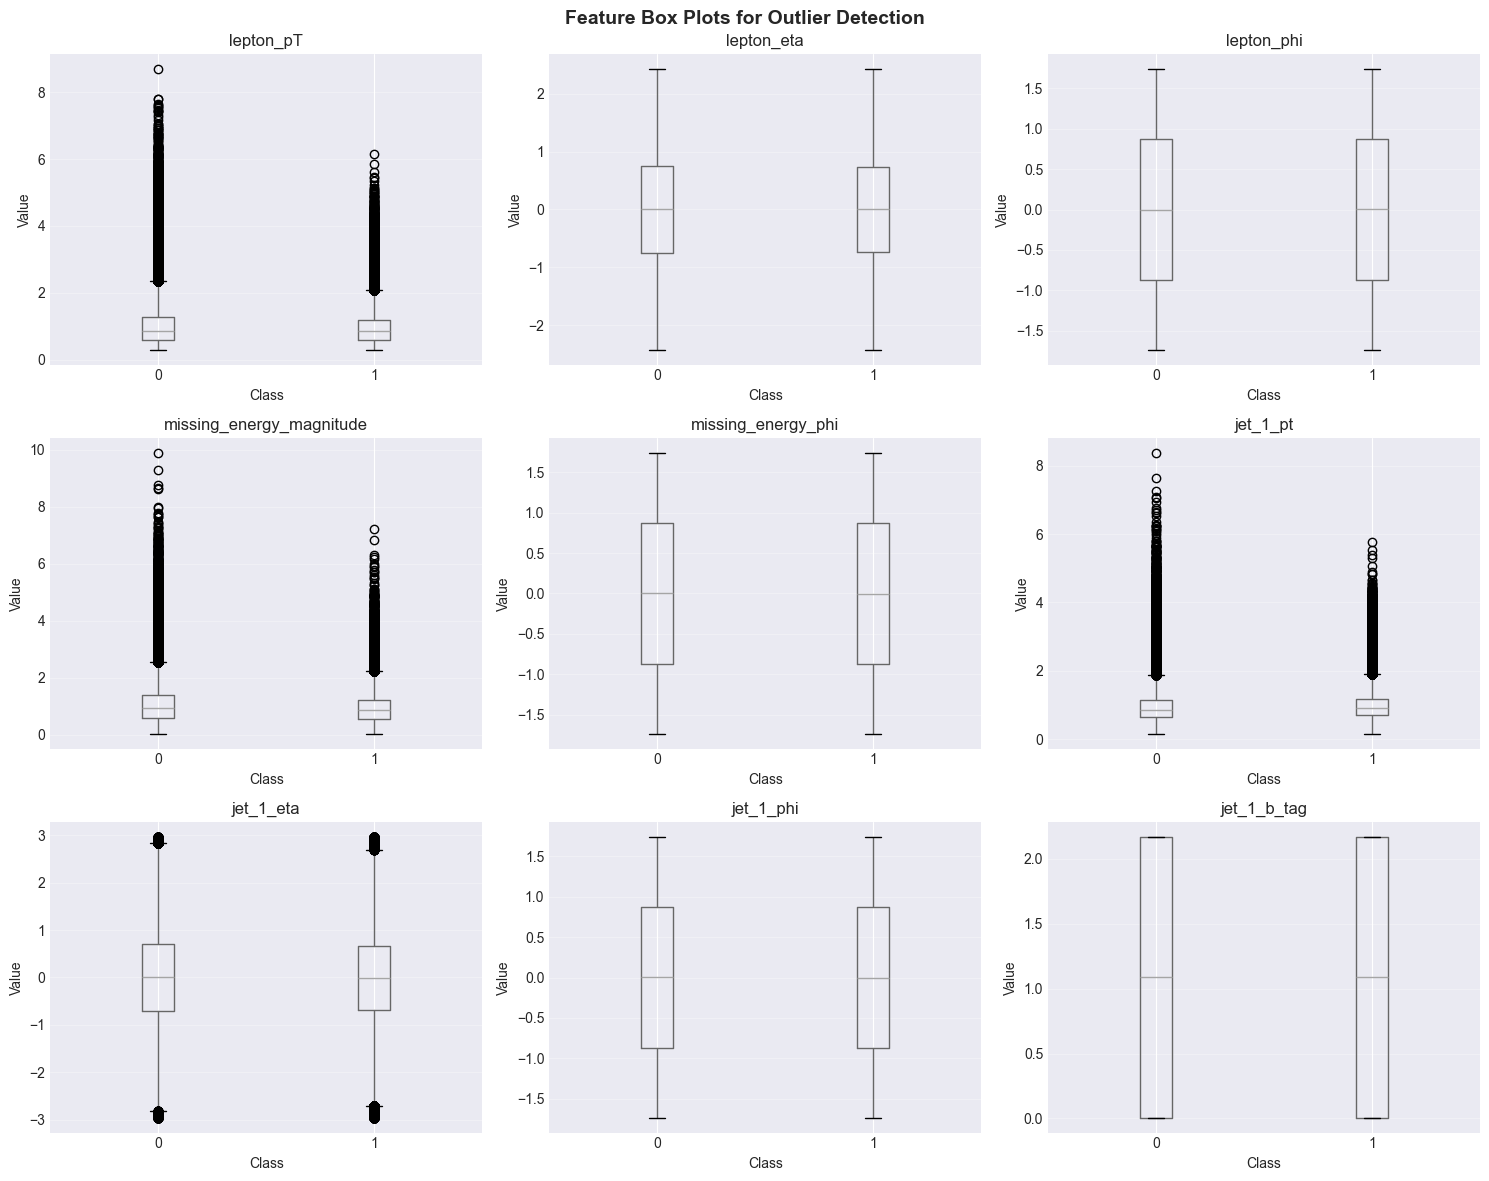

Low-level feature box plots created!
Box plots saved to C:\Users\Ashutosh\Documents\Projects\beyond-smote-evaluation\results\figures\07_boxplots_highlevel.png


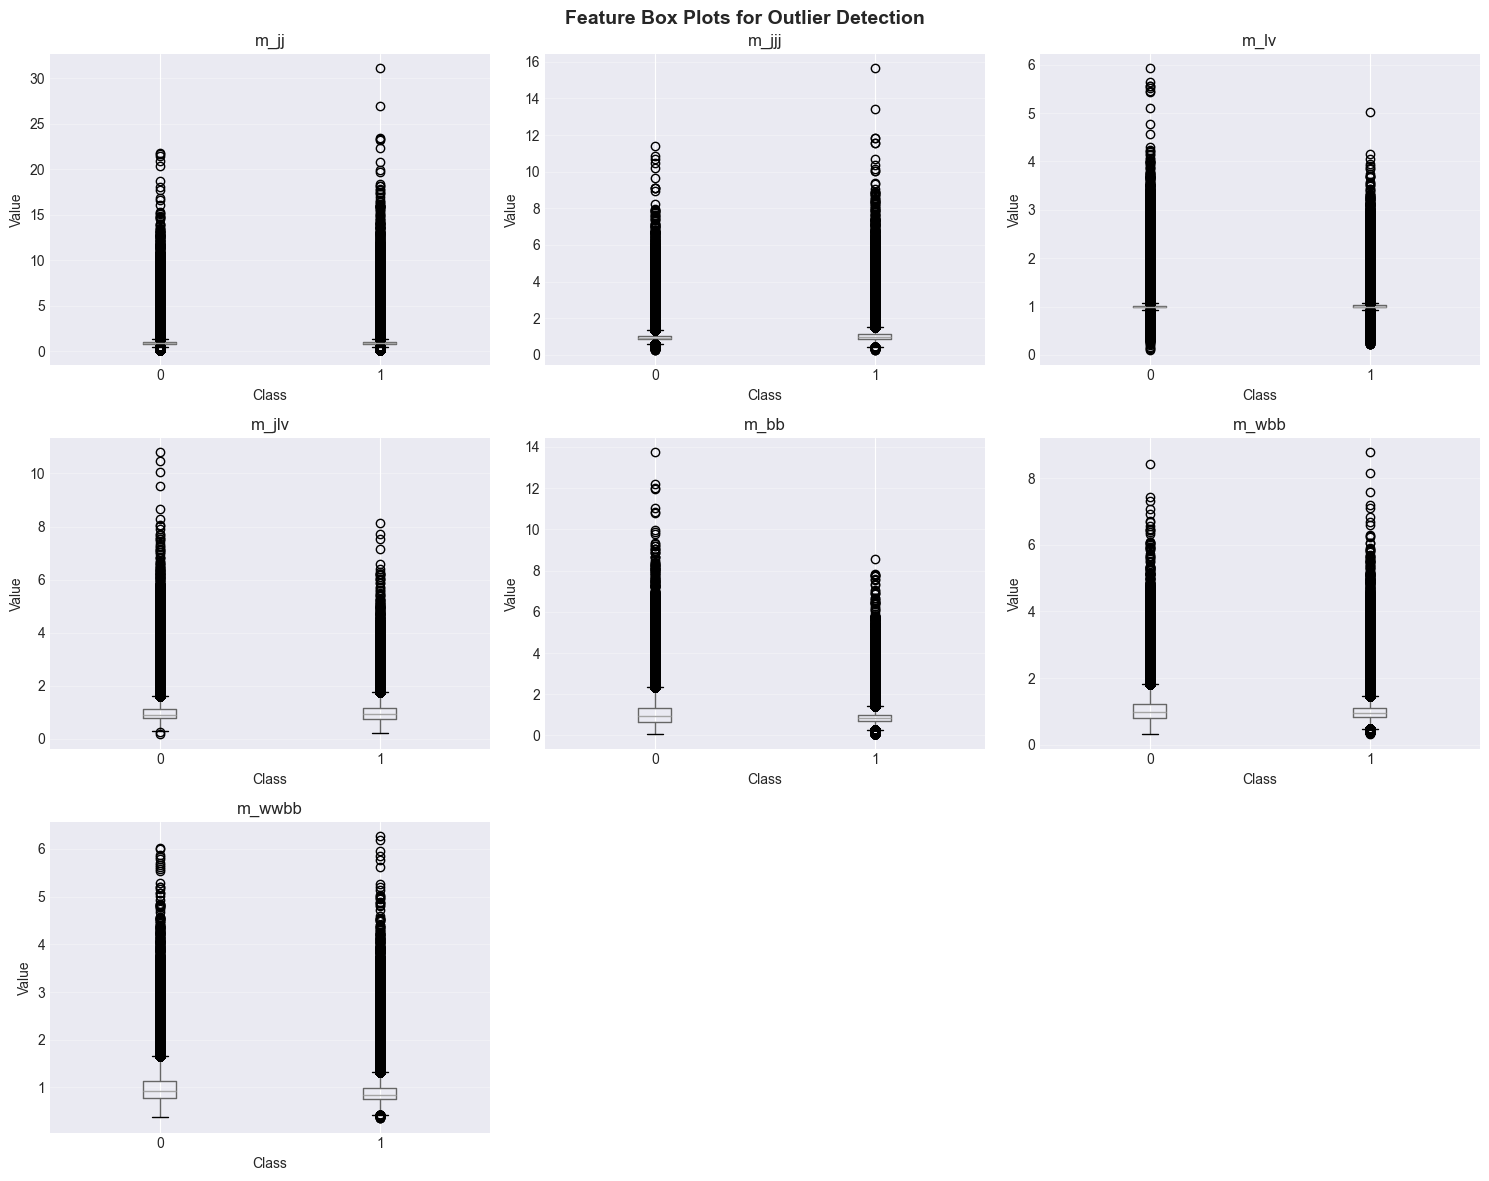

High-level feature box plots created!

Outlier Analysis (using IQR method):
      Feature  Outlier_Count
23       m_lv         199241
21       m_jj         140159
22      m_jjj          75204
26      m_wbb          62610
25       m_bb          60574
27     m_wwbb          60007
24      m_jlv          51203
5    jet_1_pt          49554
9    jet_2_pt          40195
0   lepton_pT          38946

Note: Outliers are expected in physics data and may be real events,
not necessarily errors. We'll keep them for now.


In [17]:
# Cell 12: Outlier Detection with Box Plots
# Identifying outliers and extreme values in features
# Box plots for each feature showing quartiles and outliers

print("Generating box plots for outlier detection...")

# Creating box plots for low-level features
plot_feature_boxplots(
    data=data_with_target,
    features=ALL_FEATURES[:9],
    target_col=TARGET_COL,
    save_path=FIGURE_OUTPUT / '06_boxplots_lowlevel.png',
    max_features=9
)

print("Low-level feature box plots created!")

# Creating box plots for high-level features
plot_feature_boxplots(
    data=data_with_target,
    features=ALL_FEATURES[-7:],
    target_col=TARGET_COL,
    save_path=FIGURE_OUTPUT / '07_boxplots_highlevel.png',
    max_features=7
)

print("High-level feature box plots created!")

# Quantifying outliers
print("\nOutlier Analysis (using IQR method):")
outlier_counts = {}

for feature in ALL_FEATURES:
    Q1 = X[feature].quantile(0.25)
    Q3 = X[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((X[feature] < lower_bound) | (X[feature] > upper_bound)).sum()
    outlier_counts[feature] = outliers

# Showing features with most outliers
outlier_df = pd.DataFrame(list(outlier_counts.items()), 
                          columns=['Feature', 'Outlier_Count'])
outlier_df = outlier_df.sort_values('Outlier_Count', ascending=False)

print(outlier_df.head(10))

print("\nNote: Outliers are expected in physics data and may be real events,")
print("not necessarily errors. We'll keep them for now.")

In [18]:
# Cell 13: Data Cleaning
# Note: HIGGS dataset is already clean, but we will perform checks

print("DATA CLEANING")

# Performing data cleaning using utility function
X_clean, y_clean = perform_data_cleaning(
    features=X,
    labels=y,
    eliminate_outliers=False,  # Keep outliers for physics data
    sigma_threshold=5
)

print(f"\nCleaning complete!")
print(f"Original shape: {X.shape}")
print(f"Cleaned shape: {X_clean.shape}")
print(f"Rows removed: {len(X) - len(X_clean)}")

DATA CLEANING
Initiating data cleaning process...
Data cleaning complete, no modifications needed

Cleaning complete!
Original shape: (1000000, 28)
Cleaned shape: (1000000, 28)
Rows removed: 0


In [19]:
# Cell 14: Feature Scaling (Standardization)
# Applying StandardScaler to normalize features (mean=0, std=1)
# It is required for distance-based algorithms (SVM, KNN in SMOTE)

print("FEATURE SCALING")

# Creating train-test split first (to avoid data leakage)
X_train, X_test, y_train, y_test = generate_train_test_split(
    features=X_clean,
    labels=y_clean,
    validation_proportion=VALIDATION_SPLIT,
    seed=SEED_VALUE,
    use_stratification=True
)

# Applying scaling (fit on train, transform both)
X_train_scaled, X_test_scaled, scaler = apply_feature_scaling(
    train_features=X_train,
    test_features=X_test,
    scaler_save_path=SCALER_STORAGE / 'standard_scaler.pkl'
)

print("\nFeature scaling complete!")
print(f"Training set scaled: {X_train_scaled.shape}")
print(f"Testing set scaled: {X_test_scaled.shape}")

# Verifying scaling
print("\nScaling Verification (Training Set):")
print(f"  • Mean: {X_train_scaled.mean():.6f} (should be ~0)")
print(f"  • Std Dev: {X_train_scaled.std():.6f} (should be ~1)")

FEATURE SCALING
Generating train-test split...
Validation proportion: 20%
Stratification: Enabled
Split operation completed
Training set: 800,000 observations
Testing set: 200,000 observations
Training positive class: 52.97%
Testing positive class: 52.97%
Applying feature standardization...
Scaler fitted on training data
Test data transformed using training statistics
Scaler saved to C:\Users\Ashutosh\Documents\Projects\beyond-smote-evaluation\models\scalers\standard_scaler.pkl

Feature scaling complete!
Training set scaled: (800000, 28)
Testing set scaled: (200000, 28)

Scaling Verification (Training Set):
  • Mean: 0.000000 (should be ~0)
  • Std Dev: 1.000000 (should be ~1)


In [20]:
# Cell 15: Train-Test Split Summary
# Displaying detailed information about the data split
# Sizes, proportions, class distributions in each split

print("TRAIN-TEST SPLIT SUMMARY")

print(f"\nSplit Configuration:")
print(f"  • Train Size: {len(X_train):,} ({(1-VALIDATION_SPLIT)*100:.0f}%)")
print(f"  • Test Size: {len(X_test):,} ({VALIDATION_SPLIT*100:.0f}%)")
print(f"  • Total: {len(X_clean):,}")
print(f"  • Random Seed: {SEED_VALUE}")
print(f"  • Stratified: Yes")

print(f"\nClass Distribution in Training Set:")
train_dist = y_train.value_counts()
print(f"  • Background (0): {train_dist[0]:,} ({train_dist[0]/len(y_train)*100:.2f}%)")
print(f"  • Signal (1): {train_dist[1]:,} ({train_dist[1]/len(y_train)*100:.2f}%)")

print(f"\nClass Distribution in Test Set:")
test_dist = y_test.value_counts()
print(f"  • Background (0): {test_dist[0]:,} ({test_dist[0]/len(y_test)*100:.2f}%)")
print(f"  • Signal (1): {test_dist[1]:,} ({test_dist[1]/len(y_test)*100:.2f}%)")

print("\nInsight: Stratification ensures class proportions are maintained")
print("in both training and test sets!")

TRAIN-TEST SPLIT SUMMARY

Split Configuration:
  • Train Size: 800,000 (80%)
  • Test Size: 200,000 (20%)
  • Total: 1,000,000
  • Random Seed: 42
  • Stratified: Yes

Class Distribution in Training Set:
  • Background (0): 376,262 (47.03%)
  • Signal (1): 423,738 (52.97%)

Class Distribution in Test Set:
  • Background (0): 94,065 (47.03%)
  • Signal (1): 105,935 (52.97%)

Insight: Stratification ensures class proportions are maintained
in both training and test sets!


In [21]:
# Cell 16: Saving Processed Data

print("SAVING PROCESSED DATA")

# Converting scaled arrays back to DataFrames for saving
X_train_df = pd.DataFrame(X_train_scaled, columns=ALL_FEATURES)
X_test_df = pd.DataFrame(X_test_scaled, columns=ALL_FEATURES)

# Saving processed datasets using utility function
persist_processed_datasets(
    train_x=X_train_df,
    test_x=X_test_df,
    train_y=y_train.reset_index(drop=True),
    test_y=y_test.reset_index(drop=True),
    file_prefix='higgs'
)

print("\nAll processed data saved successfully!")
print(f"Location: {PROCESSED_DIR}")
print("\nFiles created:")
print("  • higgs_train.csv - Training set with labels")
print("  • higgs_test.csv - Test set with labels")
print("  • standard_scaler.pkl - Fitted scaler object")

SAVING PROCESSED DATA
Saving processed datasets to disk...
Datasets saved to C:\Users\Ashutosh\Documents\Projects\beyond-smote-evaluation\data\processed
Training file: higgs_train.csv
Testing file: higgs_test.csv

All processed data saved successfully!
Location: C:\Users\Ashutosh\Documents\Projects\beyond-smote-evaluation\data\processed

Files created:
  • higgs_train.csv - Training set with labels
  • higgs_test.csv - Test set with labels
  • standard_scaler.pkl - Fitted scaler object


In [22]:
# Cell 17: Key Insights Summary

print("KEY INSIGHTS FROM EDA")

print("\nINSIGHT 1: Mild Class Imbalance")
print("  • Imbalance Ratio: 1.13:1 (Background:Signal)")
print("  • Actionable: This MILD imbalance is ideal for comparing resampling")
print("    methods without extreme skew. We can evaluate if resampling helps")
print("    even in less severe cases.")

print("\nINSIGHT 2: Feature Separability")
print("  • High-level derived features (m_jj, m_wwbb, etc.) show better")
print("    class separation than low-level detector measurements")
print("  • Actionable: Feature importance analysis will likely rank these")
print("    derived features highly. Consider using them for interpretability.")

print("\nINSIGHT 3: No Strong Multicollinearity")
print("  • Most feature pairs have correlation < 0.7")
print("  • Actionable: Low multicollinearity means:")
print("    - No need for aggressive feature selection")
print("    - All features can contribute unique information")
print("    - Models won't suffer from redundancy issues")

print("\nINSIGHT 4: Presence of Outliers")
print("  • Multiple features contain outliers (expected in physics data)")
print("  • Actionable: These outliers are likely real physical events, not errors.")
print("    Tree-based models (RF, XGBoost) will handle these naturally.")
print("    Distance-based methods (SVM, KNN in SMOTE) benefit from scaling.")

print("\nINSIGHT 5: High Dimensionality")
print("  • 28 features for classification")
print("  • Actionable: High dimensionality makes this a good test case for:")
print("    - SMOTE performance in high-dimensional space")
print("    - Curse of dimensionality effects")
print("    - Deep learning vs traditional ML comparison")

KEY INSIGHTS FROM EDA

INSIGHT 1: Mild Class Imbalance
  • Imbalance Ratio: 1.13:1 (Background:Signal)
  • Actionable: This MILD imbalance is ideal for comparing resampling
    methods without extreme skew. We can evaluate if resampling helps
    even in less severe cases.

INSIGHT 2: Feature Separability
  • High-level derived features (m_jj, m_wwbb, etc.) show better
    class separation than low-level detector measurements
  • Actionable: Feature importance analysis will likely rank these
    derived features highly. Consider using them for interpretability.

INSIGHT 3: No Strong Multicollinearity
  • Most feature pairs have correlation < 0.7
  • Actionable: Low multicollinearity means:
    - No need for aggressive feature selection
    - All features can contribute unique information
    - Models won't suffer from redundancy issues

INSIGHT 4: Presence of Outliers
  • Multiple features contain outliers (expected in physics data)
  • Actionable: These outliers are likely real physic